# Image Viewer

In [1]:
viewId = 620941086

In [2]:
intrinsicId = 2578075835

In [3]:
poseId = 620941086

In [4]:
pose =  {
    "rotation": [
        "0.5119884778228212",
        "-0.064605287405302678",
        "-0.85655937063110155",
        "-0.065312902929060404",
        "-0.99720892394484895",
        "0.036174393094223656",
        "-0.85650570534448256",
        "0.03742350657053025",
        "-0.5147790379068633"
    ],
    "center": [
        "4.9691252172504887",
        "0.43863802196966523",
        "5.8891959413587713"
    ]
}

In [5]:
intrinsic =  {
    "intrinsicId": "2578075835",
    "width": "4000",
    "height": "3000",
    "sensorWidth": "6.0829658508300781",
    "sensorHeight": "4.5622243881225586",
    "serialNumber": "",
    "type": "radial3",
    "initializationMode": "estimated",
    "pxInitialFocalLength": "3120.1886037669133",
    "pxFocalLength": "3001.8524753883971",
    "principalPoint": [
        "2000.539308053239",
        "1495.4927690993923"
    ],
    "distortionParams": [
        "0.10525516721334982",
        "-0.35199160946569702",
        "0.36107671991846413"
    ],
    "locked": "0"
}

In [6]:
import numpy as np

## Intrinsic matrix

In [7]:
K = np.array([
    [float(intrinsic["pxFocalLength"]), 0, float(intrinsic["principalPoint"][0]), 0],
    [0, float(intrinsic["pxFocalLength"]), float(intrinsic["principalPoint"][1]), 0],
    [0, 0, 1, 0]
])

In [8]:
K

array([[3.00185248e+03, 0.00000000e+00, 2.00053931e+03, 0.00000000e+00],
       [0.00000000e+00, 3.00185248e+03, 1.49549277e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Rotation matrix

In [9]:
R = np.array([float(x) for x in pose["rotation"]]).reshape((3,3), order='F')

In [10]:
R

array([[ 0.51198848, -0.0653129 , -0.85650571],
       [-0.06460529, -0.99720892,  0.03742351],
       [-0.85655937,  0.03617439, -0.51477904]])

In [11]:
C = np.array([[float(x)] for x in pose["center"]])

In [12]:
C

array([[4.96912522],
       [0.43863802],
       [5.88919594]])

## Translation matrix

In [13]:
T = - np.matmul(R, C)

In [14]:
T

array([[2.52864379],
       [0.53805115],
       [7.27211793]])

## Full transformation matrix

In [15]:
M = np.vstack((np.hstack((R, T)), np.array([0, 0, 0, 1])))

In [16]:
M

array([[ 0.51198848, -0.0653129 , -0.85650571,  2.52864379],
       [-0.06460529, -0.99720892,  0.03742351,  0.53805115],
       [-0.85655937,  0.03617439, -0.51477904,  7.27211793],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

## Transform world coordinates to image coordinates

In [17]:
def get_polyline_uv(polyline, K, M):
    polyline = np.hstack((polyline[:,:3], np.ones((polyline.shape[0], 1))))
    points = np.matmul(K, np.matmul(M, polyline.T))
    return np.divide(points, points[-1,:]).astype(int)

## Sample polylines
### Green

In [18]:
green_polyline = np.array([
    [2.097919940948E+00, 1.610359922051E-02, 2.190779924393E+00, 255, 255, 255],
    [1.971269965172E+00, 2.922860085964E-01, 2.525049924850E+00, 255, 255, 255],
    [1.777729988098E+00, 6.717010140419E-01, 2.703690052032E+00, 255, 255, 255],
    [1.789610028267E+00, 1.110649943352E+00, 2.692329883575E+00, 255, 255, 255],
    [1.545259952545E+00, 1.343610048294E+00, 2.792229890823E+00, 255, 255, 255],
    [1.419679999352E+00, 2.067719936371E+00, 2.833199977875E+00, 255, 255, 255],
])

In [19]:
green_normalized = get_polyline_uv(green_polyline, K, M)

### Yellow

In [20]:
yellow_polyline = np.array([
    [8.786039948463E-01, -1.391369998455E-01, 5.187849998474E+00, 255, 255, 255],
    [8.309419751167E-01, 1.031540036201E-01, 5.227940082550E+00, 255, 255, 255],
    [7.717400193214E-01, 1.450600028038E-01, 5.208700180054E+00, 255, 255, 255],
    [5.449720025063E-01, 8.042230010033E-01, 4.987659931183E+00, 255, 255, 255],
    [4.101229906082E-01, 9.882419705391E-01, 4.878980159760E+00, 255, 255, 255],
    [3.861240148544E-01, 1.497460007668E+00, 4.794400215149E+00, 255, 255, 255],
    [2.997510135174E-01, 1.528069972992E+00, 4.036129951477E+00, 255, 255, 255],
    [4.844210147858E-01, 2.060509920120E+00, 4.073040008545E+00, 255, 255, 255]
])

In [21]:
yellow_normalized = get_polyline_uv(yellow_polyline, K, M)

### Blue

In [22]:
blue_polyline = np.array([
    [-6.572080254555E-01, 1.240900039673E+00, 2.931509971619E+00, 255, 255, 255],
    [-6.939949989319E-01, 1.198469996452E+00, 3.038789987564E+00, 255, 255, 255],
    [-6.402289867401E-01, 1.131819963455E+00, 2.981800079346E+00, 255, 255, 255],
    [-5.913980007172E-01, 1.158139944077E+00, 2.861429929733E+00, 255, 255, 255],
    [-6.572080254555E-01, 1.240900039673E+00, 2.931509971619E+00, 255, 255, 255]
])

In [23]:
blue_normalized = get_polyline_uv(blue_polyline, K, M)

### Red

In [24]:
red_polyline = np.array([
    [1.359150052071E+00, -4.094719886780E-01, 1.373669981956E+00, 255, 255, 255],
    [1.052219986916E+00, -1.273890025914E-02, 1.117300033569E+00, 255, 255, 255],
    [6.996499896049E-01, 1.551609933376E-01, 1.259979963303E+00, 255, 255, 255],
    [4.651759862900E-01, 2.271769940853E-01, 1.447430014610E+00, 255, 255, 255],
    [5.874119997025E-01, 4.343109950423E-02, 1.556470036507E+00, 255, 255, 255],
    [7.467389702797E-01, -8.026939630508E-02, 1.528660058975E+00, 255, 255, 255],
    [9.594820141792E-01, -2.254000008106E-01, 1.551689982414E+00, 255, 255, 255],
    [1.106259942055E+00, -4.076380133629E-01, 1.612190008163E+00, 255, 255, 255],
    [1.359150052071E+00, -4.094719886780E-01, 1.373669981956E+00, 255, 255, 255]
])

In [25]:
red_normalized = get_polyline_uv(red_polyline, K, M)

## Image with polylines

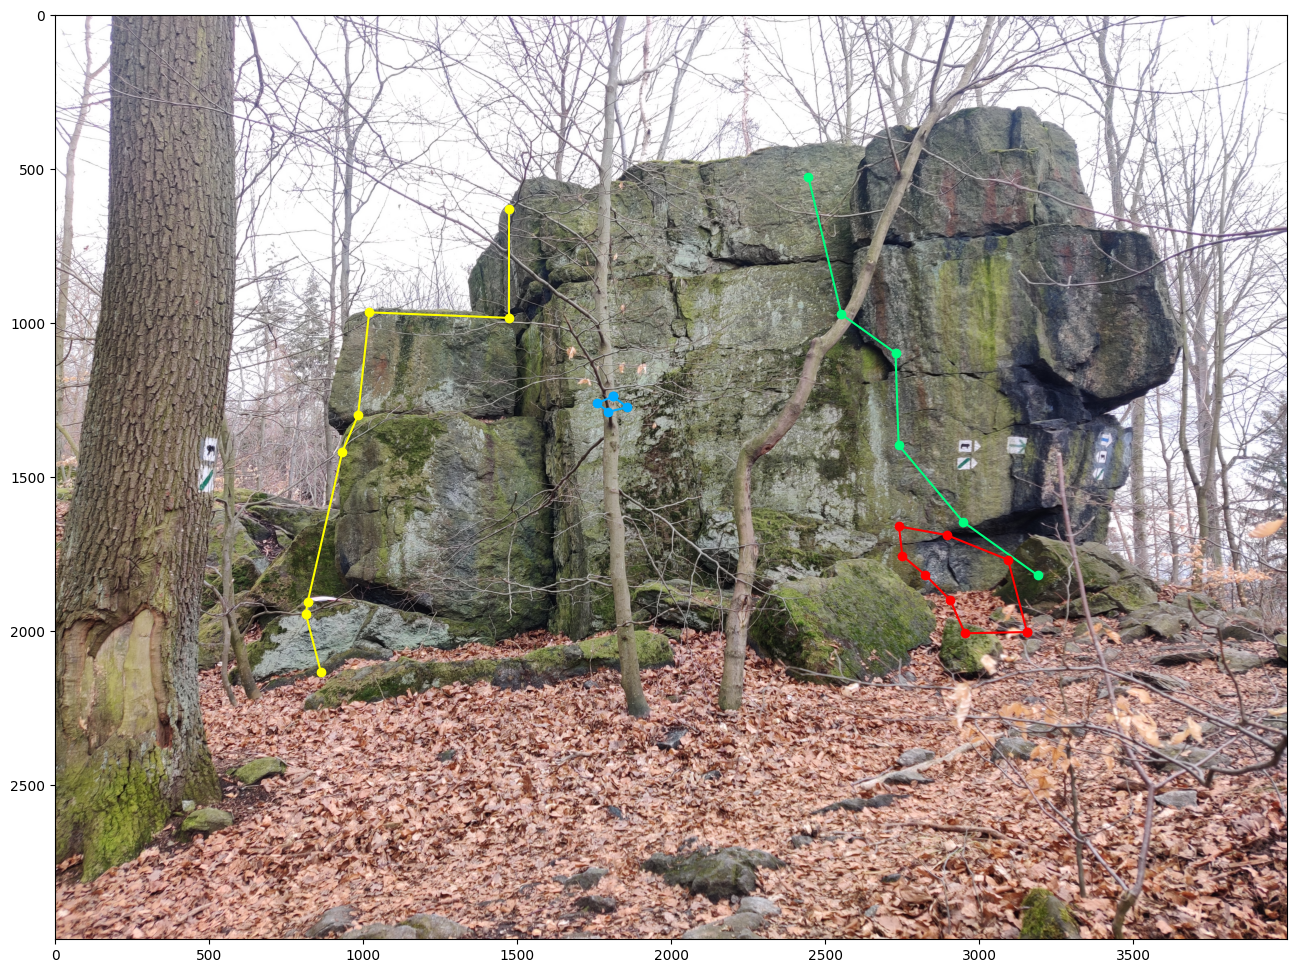

In [26]:
import matplotlib.pyplot as plt
im = plt.imread("images/img_20230320_153019.jpg")
fig, ax = plt.subplots(figsize=(16,12))
implot = ax.imshow(im)

# put a red dot, size 40, at 2 locations:
plt.plot(green_normalized[0], green_normalized[1], 'o-', c=(0, 1, 0.5))
plt.plot(yellow_normalized[0], yellow_normalized[1], 'o-', c=(1, 1, 0))
plt.plot(blue_normalized[0], blue_normalized[1], 'o-', c=(0, 170/255, 1))
plt.plot(red_normalized[0], red_normalized[1], 'o-', c=(1, 0, 0))

plt.show()

## Yaw, pitch, roll of the camera

In [27]:
def get_yaw_pitch_roll(R):
    yaw = np.arctan2(R[1,0], R[0,0])
    pitch = np.arctan2(-R[2,0], np.sqrt(R[2,1]**2+R[2,2]**2))
    roll = np.arctan2(R[2,1], R[2,2])
    return yaw, pitch, roll

In [28]:
yaw, pitch, roll = get_yaw_pitch_roll(R)

In [29]:
print(yaw, pitch, roll)

-0.12552163411481215 1.0285650560355977 3.0714362916284172


In [30]:
for x in (yaw, pitch, roll): print(np.rad2deg(x)) 

-7.191859872364069
58.93243666547677
175.98033655362102


In [31]:
import json

In [32]:
import sys
sys.path.insert(0, '..')

In [33]:
from topoutils import visibility_writer
from topoutils.constants import PROJECT_DIR

In [34]:
blue_visibility = visibility_writer.from_json(PROJECT_DIR.joinpath('visibility', 'BluePolyline.json'))
red_visibility = visibility_writer.from_json(PROJECT_DIR.joinpath('visibility', 'RedPolyline.json'))
yellow_visibility = visibility_writer.from_json(PROJECT_DIR.joinpath('visibility', 'YellowPolyline.json'))
green_visibility = visibility_writer.from_json(PROJECT_DIR.joinpath('visibility', 'GreenPolyline.json'))

## Eye

In [37]:
eye = [float(x) for x in pose["center"]]

In [38]:
eye

[4.969125217250489, 0.4386380219696652, 5.889195941358771]

### Verifying that arccos in numpy takes quadrants into account

In [39]:
x=3
y=4
z=2
r = np.sqrt(x**2 + y**2 + z**2)
print(np.arccos(z/r))
print(np.arctan(np.sqrt(x**2+y**2)/z))

1.1902899496825317
1.1902899496825317


In [40]:
x=3
y=4
z=-2
r = np.sqrt(x**2 + y**2 + z**2)
print(np.arccos(z/r))
print(np.arctan(np.sqrt(x**2+y**2)/z) + np.pi)

1.9513027039072615
1.9513027039072615


In [41]:
x=3
y=4
z=0
r = np.sqrt(x**2 + y**2 + z**2)
print(np.arccos(z/r))
print(np.pi/2)

1.5707963267948966
1.5707963267948966


## Distance and angles of the vector from a vertex to the eye

### Check 1 - invisible point on blue polyline

In [45]:
P = blue_visibility.vertices[0]

In [46]:
P

Vertex(id=0, x=-0.6572080254555, y=1.240900039673, z=2.931509971619, visibility_grid=[1.6021438867303224e-06, 2.0812455781690564e-06, 3.848182816176823e-06, 8.291974822435219e-06, 1.673562080083281e-05, 1.293397797782254e-05, 4.233770901865809e-06, 1.8083237648837604e-06, 7.445321525817452e-07, 1.282379307173963e-06, 7.682573096280463e-06, inf, inf, 0.01343633299104943, 1.8467792284054336e-05, 1.0531650490226514e-06, 5.47569993945392e-07, 1.135305615166921e-06, 4.06350809989898e-05, inf, inf, 0.3647134004421304, 0.012165227456734543, 9.00065926817425e-07, 5.584935139238351e-07, 1.380520585409198e-06, inf, inf, inf, 0.44388662401396295, 0.023752914762575964, 1.055823115149934e-06, 7.956139743602691e-07, 2.487048201334105e-06, inf, inf, inf, 0.6425319507940255, 0.02607689817081338, 1.8056217454193138e-06, 1.858980454804249e-06, 9.73102470841568e-06, inf, inf, inf, 1.8121768493660344, 0.7538055641376202, 6.191432515994698e-06, 1.8246821813107736e-05, inf, inf, inf, inf, inf, 3.06455317353

In [64]:
dX = eye[0] - P.x
dY = eye[1] - P.y
dZ = eye[2] - P.z
r = np.sqrt(dX**2 + dY**2 + dZ**2)
polar = np.arccos(dZ/r) % np.pi
azimuthal = np.arctan2(dY, dX) % (2 * np.pi)

In [65]:
polar  # v

1.0909447302845163

In [66]:
azimuthal # u

6.141549511799245

In [67]:
r

6.406805475322581

In [68]:
n = int(np.sqrt(len(P.visibility_grid)))
n

8

In [55]:
from topoutils.sphere_sampling import get_spherical_coordinates

In [56]:
u, v = get_spherical_coordinates(n)

In [59]:
u

array([0.39269908, 1.17809725, 1.96349541, 2.74889357, 3.53429174,
       4.3196899 , 5.10508806, 5.89048623])

In [72]:
u_idx = np.argmin(np.abs(u - azimuthal))

In [74]:
v_idx = np.argmin(np.abs(v - polar))

In [79]:
P_visibility_grid = np.array(P.visibility_grid).reshape((n, n), order='F')

In [80]:
P_visibility_grid[u_idx][v_idx]

9.00065926817425e-07

In [81]:
P_visibility_grid[u_idx][v_idx] >= r

False

### Check 2 - visible point on green polyline

In [82]:
P = green_visibility.vertices[0]

In [83]:
dX = eye[0] - P.x
dY = eye[1] - P.y
dZ = eye[2] - P.z
r = np.sqrt(dX**2 + dY**2 + dZ**2)
polar = np.arccos(dZ/r) % np.pi
azimuthal = np.arctan2(dY, dX) % (2 * np.pi)

In [84]:
u_idx = np.argmin(np.abs(u - azimuthal))
v_idx = np.argmin(np.abs(v - polar))
P_visibility_grid = np.array(P.visibility_grid).reshape((n, n), order='F')
print(P_visibility_grid[u_idx][v_idx])
print(P_visibility_grid[u_idx][v_idx] >= r)

inf
True


### All points at once